### Q4: Total sales in 2015

In [1]:
import psycopg2
import pandas as pd
import numpy as np
import psycopg2.extras
import matplotlib.pyplot as plt

In [2]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database = "ecomdb",
                                                  user = "postgres",
                                                  password = "sultanmahmud22",
                                                  host = "127.0.0.1",
                                                  port= "5432")
    def getConnection(self):
        print("Successfully connected to the database")
        return self.connection

con = PostgresConnection().getConnection()

Successfully connected to the database


In [5]:
con = PostgresConnection().getConnection()

cur = con.cursor()
select_stmt = "SELECT s.division, tim.month, SUM(t.total_price) " \
"FROM star_schema.fact_table t  " \
"JOIN star_schema.store_dim s on s.store_key = t.store_key " \
"JOIN star_schema.time_dim tim on tim.time_key = t.time_key " \
"JOIN star_schema.trans_dim tr on tr.payment_key = t.payment_key " \
"WHERE tim.year='2015' " \
"GROUP BY CUBE(s.division ,tim.month) "\
"ORDER BY s.division "
cur.execute(select_stmt)
records = cur.fetchall()
records

df = pd.DataFrame(list(records), columns = ['Year','Month', 'Sales'])
# df = df.dropna()
df['Sales'] = df['Sales'].astype('float64')
df['Month'] = df['Month'].astype('object')
# fig = df.plot.bar(x='Month', y='Sales', figsize=(10,7), rot=0)
df


Successfully connected to the database


,Year,Month,Sales
0,BARISAL,1.0,86244.75
1,BARISAL,3.0,99066.00
2,BARISAL,12.0,92243.75
3,BARISAL,7.0,92942.25
4,BARISAL,4.0,89232.75
...,...,...,...
99,None,12.0,1279379.50
100,None,3.0,1296063.75
101,None,8.0,1256038.75
102,None,NaN,15095720.25


In [6]:
df = df.dropna()
df

,Year,Month,Sales
0,BARISAL,1.0,86244.75
1,BARISAL,3.0,99066.00
2,BARISAL,12.0,92243.75
3,BARISAL,7.0,92942.25
4,BARISAL,4.0,89232.75
...,...,...,...
85,SYLHET,2.0,62641.00
86,SYLHET,10.0,66341.50
88,SYLHET,5.0,69422.25
89,SYLHET,1.0,65704.00


Text(0, 0.5, 'Total Sales in each month')

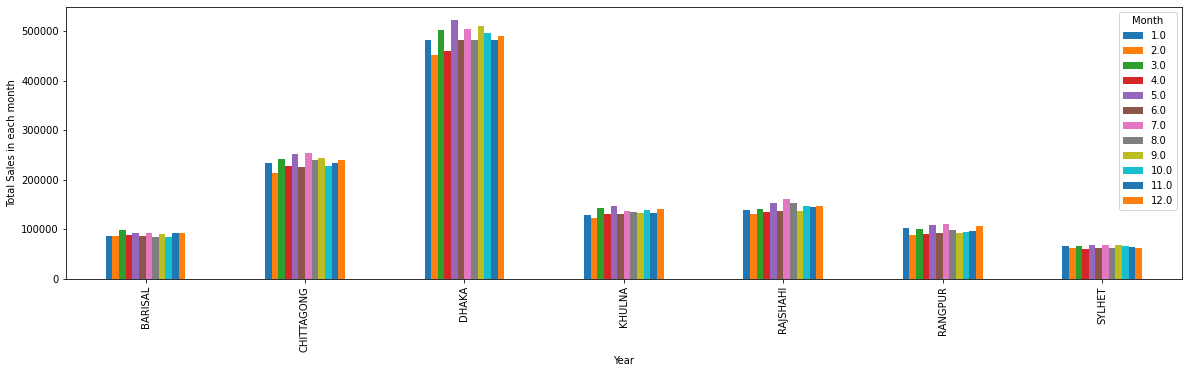

In [7]:
df_pivot = pd.pivot_table(df, values="Sales", index="Year", columns="Month")

ax = df_pivot.plot(kind="bar")

fig = ax.get_figure()

fig.set_size_inches(20, 5)

ax.set_xlabel("Year")
ax.set_ylabel("Total Sales in each month")
